In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("train.csv")

In [4]:
df.head(10)

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,6,0,70000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,0,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
7,8,0,47000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
8,9,0,105000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
9,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.info(max_cols=1216)

# Select columns by index (yaha par bureau ka naya df banaya hai)
column_indices = list(range(1119,1160))  # Example: Select columns from index 10 to 29
df_onus = df.iloc[:, column_indices]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96806 entries, 0 to 96805
Data columns (total 1216 columns):
 #     Column                     Non-Null Count  Dtype  
---    ------                     --------------  -----  
 0     account_number             96806 non-null  int64  
 1     bad_flag                   96806 non-null  int64  
 2     onus_attribute_1           71575 non-null  float64
 3     transaction_attribute_1    71575 non-null  float64
 4     transaction_attribute_2    71575 non-null  float64
 5     transaction_attribute_3    71575 non-null  float64
 6     transaction_attribute_4    71575 non-null  float64
 7     transaction_attribute_5    71575 non-null  float64
 8     transaction_attribute_6    71575 non-null  float64
 9     transaction_attribute_7    71575 non-null  float64
 10    transaction_attribute_8    71575 non-null  float64
 11    transaction_attribute_9    71575 non-null  float64
 12    transaction_attribute_10   71575 non-null  float64
 13    transaction_

In [22]:
df_onus['bad_flag'] = df['bad_flag'].reset_index(drop=True)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_14584\440401577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_onus['bad_flag'] = df['bad_flag'].reset_index(drop=True)


In [24]:
df_onus

,onus_attribute_2,onus_attribute_3,onus_attribute_4,onus_attribute_5,onus_attribute_6,onus_attribute_7,onus_attribute_8,onus_attribute_9,onus_attribute_10,onus_attribute_11,...,onus_attribute_34,onus_attribute_35,onus_attribute_36,onus_attribute_37,onus_attribute_38,onus_attribute_39,onus_attribute_40,onus_attribute_41,onus_attribute_42,bad_flag
0,0.000000,0,0,0.00,NaN,NaN,1.000000,20.000000,3.0,1.000000,...,0,0,0,0,0,0,0,0,0,0
1,0.493875,0,1,47798.58,0.023173,0.043824,0.100406,0.158203,3.0,0.036894,...,1,0,0,0,5,3,2,0,0,0
2,0.430024,0,0,9325.00,0.977756,19.555206,0.686658,13.733095,3.0,0.494380,...,0,0,0,0,0,0,0,0,0,0
3,0.014543,0,0,2082.08,0.097397,1.947935,0.151399,3.027953,3.0,0.141017,...,0,0,0,0,0,0,0,0,0,0
4,0.002247,0,0,0.00,NaN,NaN,6.862029,137.241472,3.0,1.000048,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96801,0.230799,0,0,101000.00,-194.731585,NaN,0.993882,13.070553,3.0,0.505401,...,0,0,0,0,2,0,0,1,0,0
96802,0.228789,0,1,5273.72,0.973424,0.973424,0.678247,1.250598,3.0,0.539662,...,0,0,1,0,4,2,1,0,1,0
96803,0.930213,0,0,80073.00,1.003147,20.062941,0.351108,7.022165,3.0,0.346617,...,0,0,0,0,5,1,0,0,0,0
96804,0.179787,0,0,1010.00,0.002126,0.042517,0.001351,0.027023,3.0,0.001350,...,0,0,0,0,0,0,0,0,1,0


In [42]:
# Select the first 50,000 rows
subset_df_onus = df_onus.iloc[:50000]

# Save the subset to a CSV file
subset_df_onus.to_csv('df_onus_50000_rows.csv', index=False)


In [30]:
df_onus.isnull().sum()

onus_attribute_2         0
onus_attribute_3         0
onus_attribute_4         0
onus_attribute_5         2
onus_attribute_6     35663
onus_attribute_7     44954
onus_attribute_8     28238
onus_attribute_9     30431
onus_attribute_10        2
onus_attribute_11    27372
onus_attribute_12    28784
onus_attribute_13        2
onus_attribute_14    27368
onus_attribute_15    28775
onus_attribute_16        2
onus_attribute_17        0
onus_attribute_18        0
onus_attribute_19        0
onus_attribute_20        0
onus_attribute_21        0
onus_attribute_22        0
onus_attribute_23        0
onus_attribute_24        0
onus_attribute_25        0
onus_attribute_26        0
onus_attribute_27        0
onus_attribute_28        0
onus_attribute_29        0
onus_attribute_30        0
onus_attribute_31        0
onus_attribute_32        0
onus_attribute_33        0
onus_attribute_34        0
onus_attribute_35        0
onus_attribute_36        0
onus_attribute_37        0
onus_attribute_38        0
o

<Axes: >

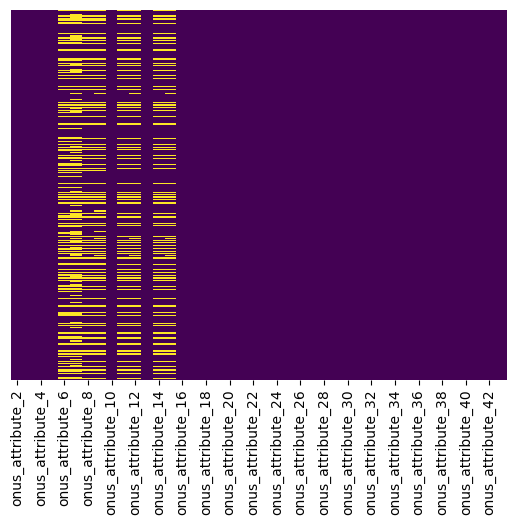

In [36]:
sns.heatmap(df_onus.isnull(), yticklabels=False, 
                cbar=False, 
                cmap='viridis')

In [51]:
# ab hum yaha par na values fill karenge

# will use "ITERATIVE IMPUTER (MICR)"

In [53]:
from sklearn.experimental import enable_iterative_imputer  # Needed for experimental feature
from sklearn.impute import IterativeImputer

# Initialize the Iterative Imputer with default parameters
iterative_imputer = IterativeImputer(max_iter=10, random_state=42)

In [55]:
# Apply to the entire DataFrame
imputed_data = iterative_imputer.fit_transform(df_onus)

In [58]:
# Convert the result back to a DataFrame
onus_data_imputed = pd.DataFrame(imputed_data, columns=df_onus.columns)

In [60]:
# Check if any missing values remain
print(onus_data_imputed.isna().sum().sum())

0


In [62]:
onus_data_imputed

,onus_attribute_2,onus_attribute_3,onus_attribute_4,onus_attribute_5,onus_attribute_6,onus_attribute_7,onus_attribute_8,onus_attribute_9,onus_attribute_10,onus_attribute_11,...,onus_attribute_34,onus_attribute_35,onus_attribute_36,onus_attribute_37,onus_attribute_38,onus_attribute_39,onus_attribute_40,onus_attribute_41,onus_attribute_42,bad_flag
0,0.000000,0.0,0.0,0.00,-1245.594710,-1098.325109,1.000000,20.000000,3.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.493875,0.0,1.0,47798.58,0.023173,0.043824,0.100406,0.158203,3.0,0.036894,...,1.0,0.0,0.0,0.0,5.0,3.0,2.0,0.0,0.0,0.0
2,0.430024,0.0,0.0,9325.00,0.977756,19.555206,0.686658,13.733095,3.0,0.494380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.014543,0.0,0.0,2082.08,0.097397,1.947935,0.151399,3.027953,3.0,0.141017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.002247,0.0,0.0,0.00,-1240.500897,-1113.688963,6.862029,137.241472,3.0,1.000048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96801,0.230799,0.0,0.0,101000.00,-194.731585,-46.844650,0.993882,13.070553,3.0,0.505401,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
96802,0.228789,0.0,1.0,5273.72,0.973424,0.973424,0.678247,1.250598,3.0,0.539662,...,0.0,0.0,1.0,0.0,4.0,2.0,1.0,0.0,1.0,0.0
96803,0.930213,0.0,0.0,80073.00,1.003147,20.062941,0.351108,7.022165,3.0,0.346617,...,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0
96804,0.179787,0.0,0.0,1010.00,0.002126,0.042517,0.001351,0.027023,3.0,0.001350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [82]:
onus_data_imputed.isnull().sum()


onus_attribute_2     0
onus_attribute_3     0
onus_attribute_4     0
onus_attribute_5     0
onus_attribute_6     0
onus_attribute_7     0
onus_attribute_8     0
onus_attribute_9     0
onus_attribute_10    0
onus_attribute_11    0
onus_attribute_12    0
onus_attribute_13    0
onus_attribute_14    0
onus_attribute_15    0
onus_attribute_16    0
onus_attribute_17    0
onus_attribute_18    0
onus_attribute_19    0
onus_attribute_20    0
onus_attribute_21    0
onus_attribute_22    0
onus_attribute_23    0
onus_attribute_24    0
onus_attribute_25    0
onus_attribute_26    0
onus_attribute_27    0
onus_attribute_28    0
onus_attribute_29    0
onus_attribute_30    0
onus_attribute_31    0
onus_attribute_32    0
onus_attribute_33    0
onus_attribute_34    0
onus_attribute_35    0
onus_attribute_36    0
onus_attribute_37    0
onus_attribute_38    0
onus_attribute_39    0
onus_attribute_40    0
onus_attribute_41    0
onus_attribute_42    0
bad_flag             0
dtype: int64

In [66]:
# now doing feature scaling


In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(onus_data_imputed)

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(onus_data_imputed)

In [72]:
# now train_test_split

In [74]:
from sklearn.model_selection import train_test_split

X = scaled_data[:, :-1]  
y = scaled_data[:, -1]   # target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
## CHECKING CORRELATION AMONG FEATURES TO CHECK IF PCA IS REQUIRED

# Set a correlation threshold (e.g., 0.8 for high correlation)
threshold = 0.8

# Compute the correlation matrix
corr_matrix = onus_data_imputed.corr()

# Find pairs of features with correlation above the threshold
correlated_features = np.where(np.abs(corr_matrix) > threshold)
correlated_pairs = [(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]) 
                    for i, j in zip(*correlated_features) if i != j and i < j]

# Display correlated pairs
for feature1, feature2, corr_value in correlated_pairs:
    print(f"Correlation between {feature1} and {feature2}: {corr_value:.2f}")


Correlation between onus_attribute_2 and onus_attribute_17: 0.88
Correlation between onus_attribute_2 and onus_attribute_20: 0.85
Correlation between onus_attribute_2 and onus_attribute_23: 0.85
Correlation between onus_attribute_6 and onus_attribute_7: 1.00
Correlation between onus_attribute_9 and onus_attribute_12: 0.85
Correlation between onus_attribute_9 and onus_attribute_15: 0.85
Correlation between onus_attribute_10 and onus_attribute_13: 0.91
Correlation between onus_attribute_10 and onus_attribute_16: 0.90
Correlation between onus_attribute_10 and onus_attribute_19: 0.87
Correlation between onus_attribute_10 and onus_attribute_22: 0.92
Correlation between onus_attribute_10 and onus_attribute_25: 0.90
Correlation between onus_attribute_11 and onus_attribute_14: 1.00
Correlation between onus_attribute_12 and onus_attribute_15: 1.00
Correlation between onus_attribute_13 and onus_attribute_16: 1.00
Correlation between onus_attribute_13 and onus_attribute_22: 1.00
Correlation betwe

In [84]:
# applying PCA to reduce dimensions

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Retains 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [86]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by components: {explained_variance}")

Explained variance by components: [0.4021771  0.17960377 0.13272737 0.09260492 0.04520454 0.03658982
 0.03340342 0.01438586 0.01237689 0.01052779]


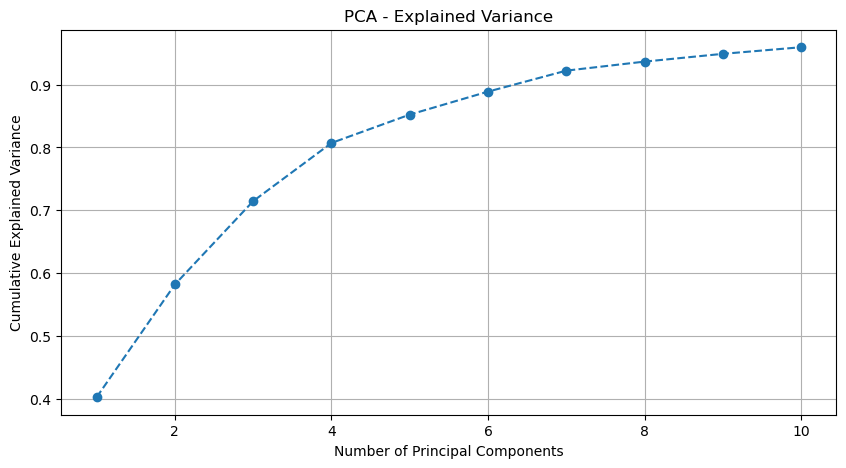

In [88]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid(True)
plt.show()

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9856414847462296


In [92]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Accuracy: 0.9871220990289925


In [98]:
X_df=pd.DataFrame(X_train)
X_df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.673935,0.0,0.0,0.005404,0.602250,0.602237,0.945262,0.009330,0.759589,0.828305,...,0.333333,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,0.0
1,0.467122,0.0,0.0,0.001883,0.602330,0.602315,0.945260,0.009334,0.759589,0.828306,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.546858,0.0,1.0,0.001883,0.602240,0.602220,0.945208,0.009368,0.278766,0.828262,...,0.000000,0.0,0.0,0.0,0.0,0.166667,0.000000,0.0,0.0,0.0
3,0.582932,0.0,0.0,0.001883,0.602330,0.602310,0.945262,0.009297,0.519177,0.828304,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.467141,0.0,0.0,0.002557,0.602332,0.602349,0.945262,0.009333,0.759589,0.828305,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67759,0.484208,0.0,1.0,0.001883,0.602240,0.602219,0.945202,0.009368,0.278766,0.828262,...,0.333333,0.0,0.0,0.0,0.0,0.166667,0.166667,0.0,0.0,0.0
67760,0.467100,0.0,0.0,0.004483,0.602330,0.602310,0.945262,0.009297,0.519177,0.828304,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
67761,0.493704,0.0,0.0,0.003484,0.602331,0.602310,0.945262,0.009303,0.759589,0.828305,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
67762,0.467104,0.0,0.0,0.001883,0.602280,0.602276,0.945262,0.009331,0.759589,0.828306,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [102]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) 
print(f'Accuracy of Decision Tree Classifier: {accuracy}')

Accuracy of Decision Tree Classifier: 0.9763101714757937


In [104]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Gradient Boosting Classifier: {accuracy}')

Accuracy of Gradient Boosting Classifier: 0.9763101714757937


In [106]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) 
print(f'Accuracy of SVM Classifier: {accuracy}')

Accuracy of SVM Classifier: 0.9763101714757937
